Exercise 4.10

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
## Set path
path = r'/Users/leo/Desktop/Career Foundry/Achievement 4/Instacart Basket Analysis 30:10:25'

In [5]:
## Import Data
ords_prods_cust = pd.read_pickle(os.path.join(path,'02 - data','prepared data','ords_prods_cust_task_4.9.pkl'))

# 2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Since fist name and surname columns exist, I have chosen to drop these.

In [7]:
ords_prods_cust = ords_prods_cust.drop(columns=['first_name', 'surname'])

# 3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


# Create region dictionary

In [9]:
region_map = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',

    # Midwest
    'Ohio': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Missouri': 'Midwest', 'Iowa': 'Midwest', 'Minnesota': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',

    # South
    'Delaware': 'South', 'Maryland': 'South', 'Virginia': 'South', 'West Virginia': 'South',
    'Kentucky': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Tennessee': 'South',
    'Georgia': 'South', 'Florida': 'South', 'Alabama': 'South', 'Mississippi': 'South',
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'District of Columbia': 'South',

    # West
    'Montana': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'New Mexico': 'West',
    'Idaho': 'West', 'Utah': 'West', 'Arizona': 'West', 'Nevada': 'West',
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Alaska': 'West', 'Hawaii': 'West'
}


In [10]:
# Map states to regions
ords_prods_cust['region'] = ords_prods_cust['state'].map(region_map)


In [11]:
# Check region column
ords_prods_cust.head(3)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,spending_flag,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Low spender,Frequent customer,Female,Vermont,66,2018-06-16,2,married,158302,Northeast


In [12]:
# Check values count
ords_prods_cust['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

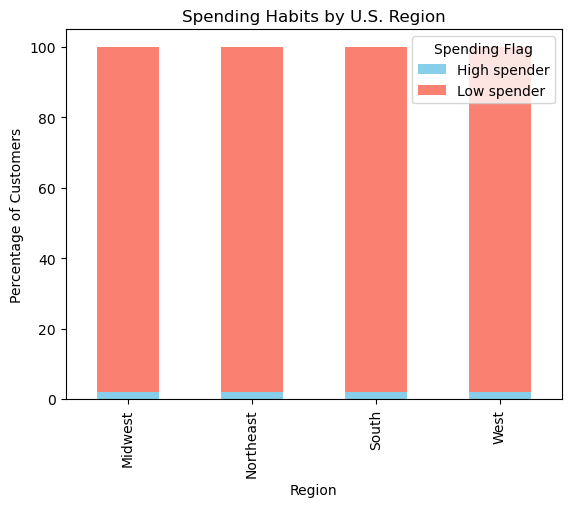

In [13]:
# Visualize and compare spending habits by region
region_spending = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], normalize='index') * 100
region_spending.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Spending Habits by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Spending Flag')
plt.show()


The chart shows that spending habits are relatively consistent across U.S. regions.
In all four regions — Midwest, Northeast, South, and West — low spenders make up the vast majority of customers, with high spenders representing only a small fraction (around 2–3%).
This suggests that regional location doesn’t have a strong impact on overall spending behavior among Instacart users.

# 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# Create exclusion flag for low-activity customers
ords_prods_cust['exclusion_flag'] = np.where(ords_prods_cust['max_order'] < 5, 'Exclude', 'Include')

In [15]:
ords_prods_cust.head(3)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,Include


In [16]:
# Chech how many rows will be excluded
ords_prods_cust['exclusion_flag'].value_counts()

exclusion_flag
Include    30964564
Exclude     1440295
Name: count, dtype: int64

In [17]:
# New dataset including only active, revenue-generating customers
ords_prods_cust_revenue_focus = ords_prods_cust[ords_prods_cust['exclusion_flag'] == 'Include']

In [18]:
ords_prods_cust_revenue_focus.shape

(30964564, 31)

In [20]:
# Export this dataset for later use
ords_prods_cust_revenue_focus.to_pickle(os.path.join(path, '02 - Data', 'prepared data', 'ords_prods_cust_revenue_focus.pkl'))

To align with the CFO’s request to focus on revenue-generating customers, I created an exclusion flag that identifies users with fewer than five total orders.
These customers were classified as “Exclude,” while all others were marked “Include.”
A new dataset, ords_prods_cust_revenue_focus, was created to include only the active customers who generate meaningful revenue for the app.
This refined dataset will be used for all further analysis.

# 5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


I will use my new data set ords_prods_cust_revenue_focused. This gives more useful marketing segments for customers that matter to revenue.

In [ ]:
## Create customer profiles

In [21]:
# Young single: under 30, no dependents
ords_prods_cust_revenue_focus.loc[
    (ords_prods_cust_revenue_focus['age'] < 30) & 
    (ords_prods_cust_revenue_focus['n_dependants'] == 0), 
    'customer_profile'
] = 'Young single'

/var/folders/19/p3csqgws1vqgpn31c7f5fcqh0000gn/T/ipykernel_57834/3665092987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_revenue_focus.loc[


In [22]:
# Young parent: under 35, has dependents
ords_prods_cust_revenue_focus.loc[
    (ords_prods_cust_revenue_focus['age'] < 35) & 
    (ords_prods_cust_revenue_focus['n_dependants'] > 0), 
    'customer_profile'
] = 'Young parent'

In [23]:
# Mid-age professional: 30–50, high income, no dependents
ords_prods_cust_revenue_focus.loc[
    (ords_prods_cust_revenue_focus['age'].between(30, 50)) & 
    (ords_prods_cust_revenue_focus['income'] > 100000) & 
    (ords_prods_cust_revenue_focus['n_dependants'] == 0), 
    'customer_profile'
] = 'Mid-age professional'

In [24]:
# Family shopper: 30–50, 2 or more dependents
ords_prods_cust_revenue_focus.loc[
    (ords_prods_cust_revenue_focus['age'].between(30, 50)) & 
    (ords_prods_cust_revenue_focus['n_dependants'] >= 2), 
    'customer_profile'
] = 'Family shopper'

In [25]:
# Senior shopper: over 60
ords_prods_cust_revenue_focus.loc[
    (ords_prods_cust_revenue_focus['age'] > 60), 
    'customer_profile'
] = 'Senior shopper'

In [26]:
# Budget-conscious: income below 50k
ords_prods_cust_revenue_focus.loc[
    (ords_prods_cust_revenue_focus['income'] < 50000), 
    'customer_profile'
] = 'Budget-conscious'

In [27]:
# Blanks set to other
ords_prods_cust_revenue_focus['customer_profile'].fillna('Other', inplace=True)

/var/folders/19/p3csqgws1vqgpn31c7f5fcqh0000gn/T/ipykernel_57834/2145541968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ords_prods_cust_revenue_focus['customer_profile'].fillna('Other', inplace=True)
/var/folders/19/p3csqgws1vqgpn31c7f5fcqh0000gn/T/ipykernel_57834/2145541968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prod

In [28]:
ords_prods_cust_revenue_focus['customer_profile'].value_counts(dropna=False)

customer_profile
Senior shopper          9281117
Other                   7532727
Family shopper          4489845
Young parent            4204470
Budget-conscious        3362554
Young single            1209665
Mid-age professional     884186
Name: count, dtype: int64

A new variable, customer_profile, was created to segment active customers into meaningful lifestyle categories.
The profiles were defined using combinations of age, income, and number of dependents, with categories such as “Young single,” “Young parent,” “Family shopper,” “Mid-age professional,” “Senior shopper,” and “Budget-conscious.”
This segmentation helps the marketing and business strategy teams target specific customer groups with more personalized campaigns.
The analysis was conducted on the filtered dataset, ords_prods_cust_revenue_focus, which includes only high-activity, revenue-generating customers.

# 6.Create an appropriate visualization to show the distribution of profiles.

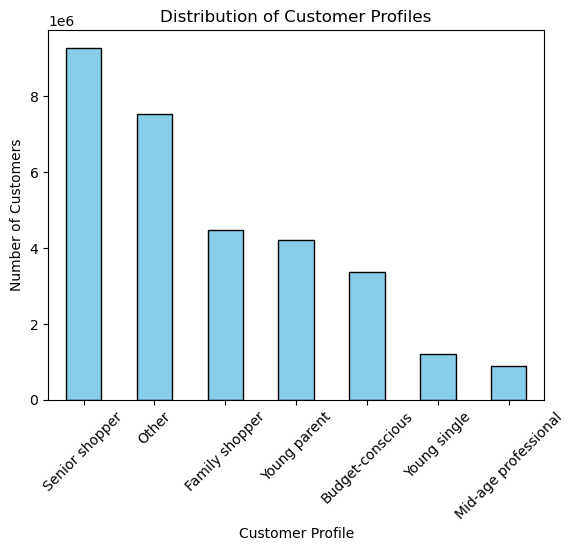

In [30]:
## Create bar chart for customer profiles
ords_prods_cust_revenue_focus['customer_profile'].value_counts().plot.bar(
    color='skyblue', edgecolor='black'
)

plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


The bar chart illustrates the distribution of customer profiles among Instacart’s active, revenue-generating users.
The largest group is Senior shoppers, followed by Family shoppers and Young parents, suggesting that the majority of Instacart’s customer base consists of older adults and families.
Smaller segments such as Young singles and Mid-age professionals represent potential growth opportunities through targeted marketing.
This breakdown provides valuable insight into which demographic profiles are most engaged with the platform and contribute the most to revenue.

# 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [31]:
## Aggregate max, mean, and min for usage frequency and expenditure
profile_summary = ords_prods_cust_revenue_focus.groupby('customer_profile').agg({
    'max_order': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
})

# Display results
profile_summary

max_order                prices               
                           max       mean min    max      mean  min
customer_profile                                                   
Budget-conscious            99  32.382129   5   25.0  6.707347  1.0
Family shopper              99  34.670067   5   25.0  7.933089  1.0
Mid-age professional        99  34.181151   5   25.0  7.951860  1.0
Other                       99  34.702826   5   25.0  7.911143  1.0
Senior shopper              99  34.555304   5   25.0  7.911155  1.0
Young parent                99  35.142529   5   25.0  7.944985  1.0
Young single                99  34.166135   5   25.0  7.943124  1.0

# 8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Step 1. Cross-tab between customer proflie and region

In [32]:
## Cross-tab of customer profiles by region
region_profile_crosstab = pd.crosstab(ords_prods_cust_revenue_focus['region'], 
                                      ords_prods_cust_revenue_focus['customer_profile'], 
                                      normalize='index') * 100

# Round for clarity
region_profile_crosstab = region_profile_crosstab.round(2)
region_profile_crosstab

customer_profile,Budget-conscious,Family shopper,Mid-age professional,Other,Senior shopper,Young parent,Young single
region,,,,,,,
Midwest,10.79,14.14,3.04,24.88,29.84,13.52,3.79
Northeast,10.74,14.53,2.57,24.15,30.32,13.68,4.00
South,11.08,14.69,2.95,23.73,29.88,13.59,4.08
West,10.71,14.57,2.75,24.72,29.99,13.54,3.73


Step 2: Cross-tab between customer profile and department

In [33]:
## Cross-tab of customer profiles by department
dept_profile_crosstab = pd.crosstab(ords_prods_cust_revenue_focus['department_id'],
                                    ords_prods_cust_revenue_focus['customer_profile'],
                                    normalize='index') * 100

dept_profile_crosstab = dept_profile_crosstab.round(2)
dept_profile_crosstab.head(10)  

customer_profile,Budget-conscious,Family shopper,Mid-age professional,Other,Senior shopper,Young parent,Young single
department_id,,,,,,,
1,10.14,14.47,2.93,24.56,30.36,13.72,3.84
2,11.29,13.75,2.88,24.10,29.66,14.45,3.87
3,9.52,14.63,3.02,24.66,30.40,13.81,3.96
4,9.10,14.86,2.90,24.74,30.48,13.88,4.04
5,12.48,13.89,3.56,23.94,28.41,14.15,3.57
6,8.45,14.89,3.00,25.04,30.39,14.12,4.13
7,14.90,13.62,2.75,23.56,28.86,12.60,3.71
8,9.25,14.25,3.54,23.95,30.80,14.19,4.04
9,7.84,14.96,2.97,25.06,30.80,14.24,4.13


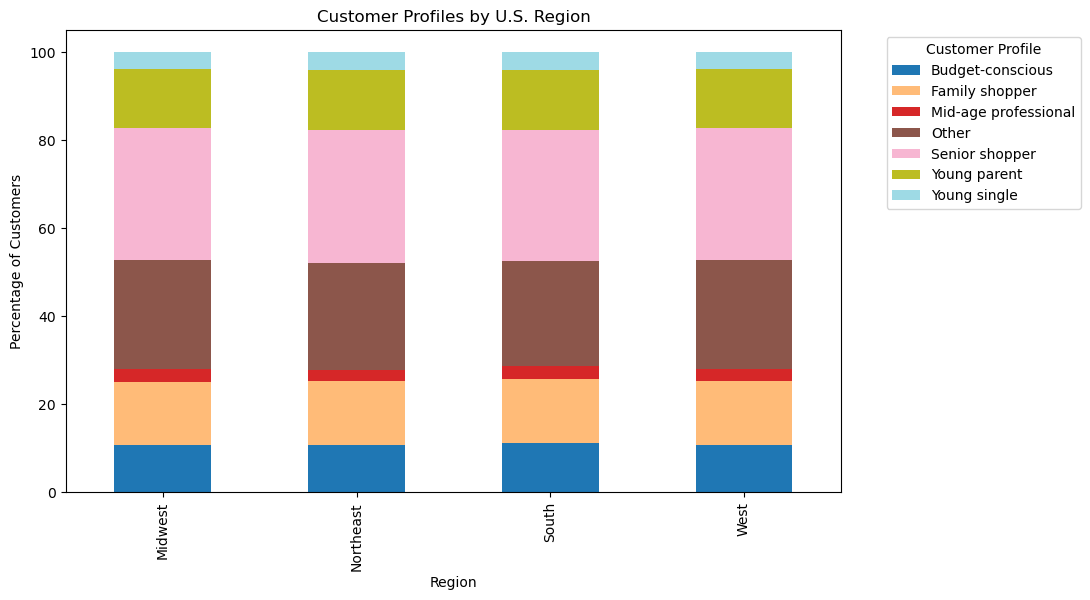

In [34]:
## Visualize customer profiles by region
region_profile_crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Customer Profiles by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The stacked bar chart shows how customer profiles are distributed across U.S. regions. Overall, the proportions of customer types are fairly consistent across all regions, with only slight variations.

Senior shoppers make up the largest segment in all regions, followed by Other and Family shoppers.

The South and Midwest regions show slightly higher proportions of Family shoppers and Young parents, suggesting larger or more family-oriented households.

The West has a slightly higher proportion of Senior shoppers, which could indicate an older customer base in that region.

These trends suggest that Instacart could tailor its marketing strategies regionally — for example, promoting family meal bundles in the South and Midwest, while highlighting health and lifestyle products for older demographics in the West.

9. Export Visualizations

In [35]:
region_spending.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'spending_habits_by_region.png'))

AttributeError: 'DataFrame' object has no attribute 'figure'

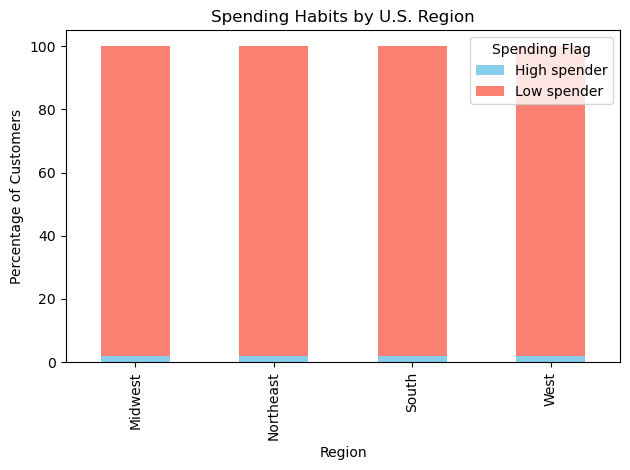

In [37]:

fig = region_spending.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon']
).get_figure()

plt.title('Spending Habits by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Spending Flag')
plt.tight_layout()

# Export the figure
fig.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'spending_habits_by_region.png'))



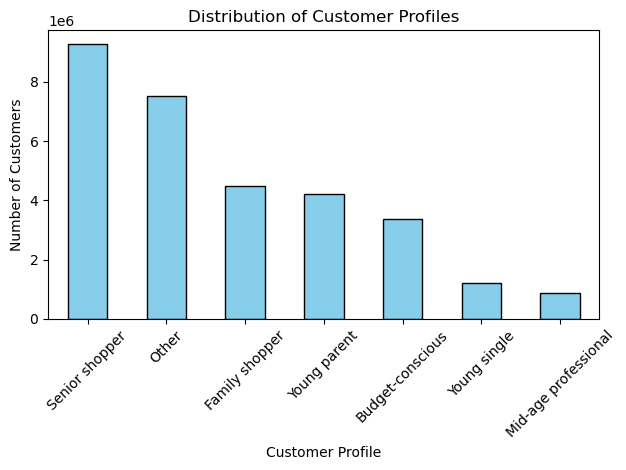

In [38]:
fig = ords_prods_cust_revenue_focus['customer_profile'].value_counts().plot.bar(
    color='skyblue', edgecolor='black'
).get_figure()

plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

# Export the figure
fig.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'distribution_of_customer_profiles.png'))


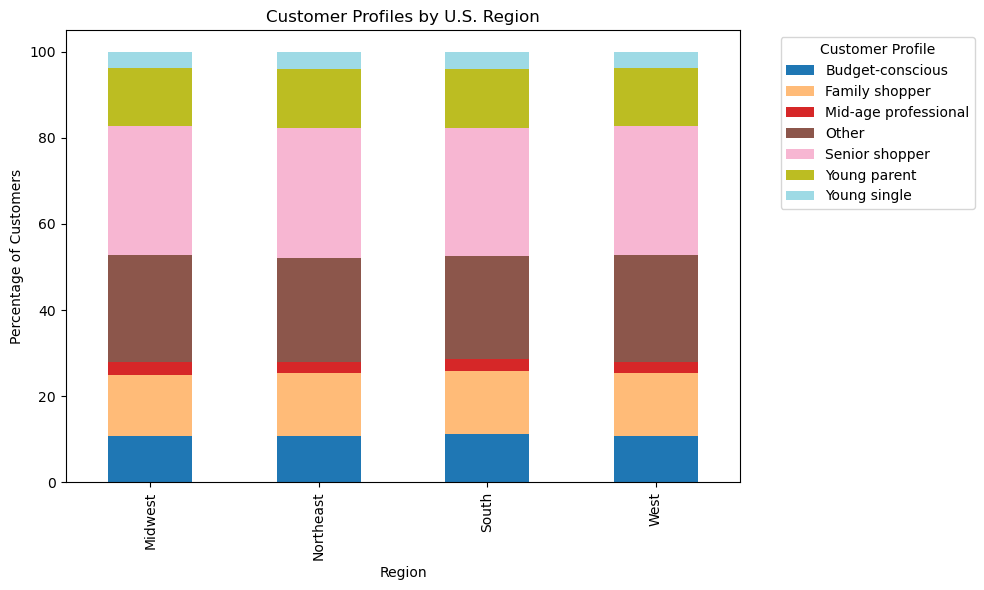

In [39]:
fig = region_profile_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
).get_figure()

plt.title('Customer Profiles by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Export the figure
fig.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'customer_profiles_by_region.png'))


10. Export data

In [40]:
# 1. Main merged dataset with customer data
ords_prods_cust.to_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'ords_prods_cust_4.10_step1.pkl'))